<a href="https://colab.research.google.com/github/mery-bigdata/mery-bigdata/blob/main/big_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [4]:
data = pd.read_csv("/content/Social_Network_Ads.xls")

In [5]:
# Display basic info
print(data.head())
print(data.info())
print(data.describe())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10

In [6]:
# 2. Data preprocessing
# Encode gender (Male=1, Female=0)
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

# Features and target
X = data[['Age', 'EstimatedSalary', 'Gender']]
y = data['Purchased']

In [7]:

# 2. Data preprocessing
# Encode gender (Male=1, Female=0)
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

# Features and target
X = data[['Age', 'EstimatedSalary', 'Gender']]
y = data['Purchased']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Feature scaling (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# 3. Train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# 4. Predictions
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

In [9]:
# 5. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.88
ROC AUC: 0.9635349635349636

Confusion Matrix:
 [[61  2]
 [10 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91        63
           1       0.93      0.73      0.82        37

    accuracy                           0.88       100
   macro avg       0.90      0.85      0.86       100
weighted avg       0.89      0.88      0.88       100



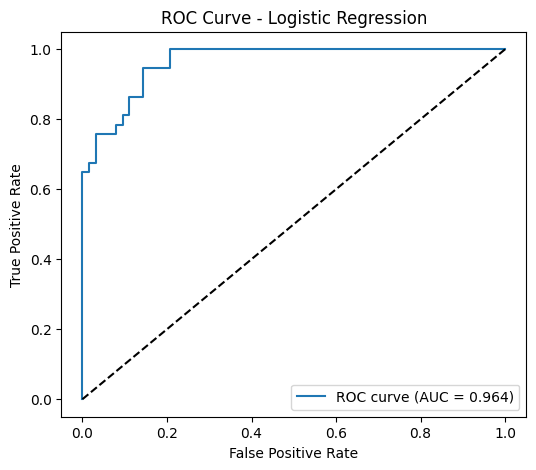

In [10]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_score(y_test, y_proba):.3f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


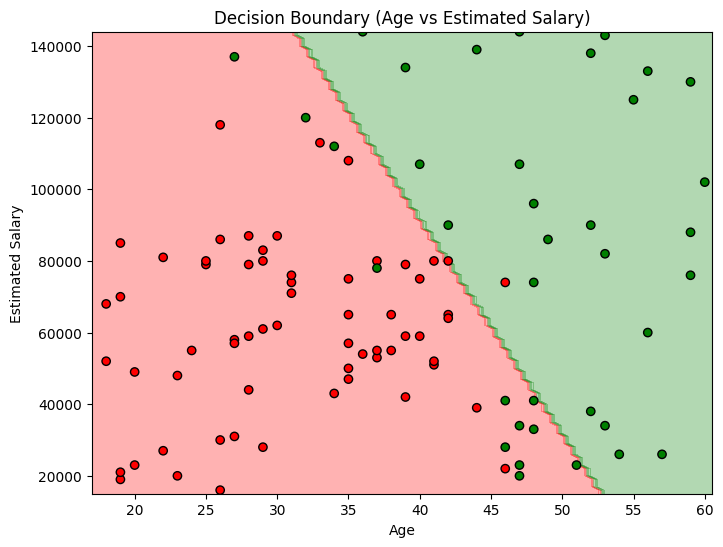

In [11]:
# 2D Decision boundary visualization (Age vs EstimatedSalary)
from matplotlib.colors import ListedColormap

X_set, y_set = X_test[['Age', 'EstimatedSalary']].values, y_test.values
X1, X2 = np.meshgrid(
    np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.5),
    np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1000)
)
Z = model.predict(scaler.transform(np.array([X1.ravel(), X2.ravel(), np.zeros_like(X1.ravel())]).T))
Z = Z.reshape(X1.shape)

plt.figure(figsize=(8,6))
plt.contourf(X1, X2, Z, alpha=0.3, cmap=ListedColormap(('red', 'green')))
plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap=ListedColormap(('red', 'green')), edgecolor='k')
plt.title('Decision Boundary (Age vs Estimated Salary)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

Reconnaissance de chiffres manuscrits (MNIST – sklearn.datasets.load_digits()).

In [12]:
import numpy as np

# Création d'une matrice
A = np.array([[1, 2, 3], [4, 5, 6]])
print(A.shape)      # (2,3)
print(A[0, 1])      # 2
print(np.mean(A))   # moyenne
print(A.reshape(3, 2))

(2, 3)
2
3.5
[[1 2]
 [3 4]
 [5 6]]


(1797, 64)
(1797, 8, 8)
[0 1 2 3 4 5 6 7 8 9]


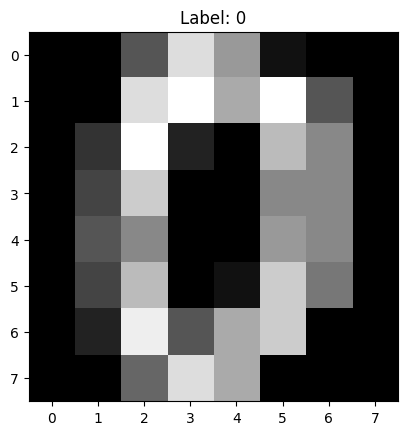

In [13]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()

print(digits.data.shape)     # (1797, 64)
print(digits.images.shape)   # (1797, 8, 8)
print(digits.target[:10])    # Les 10 premiers chiffres réels

# Affichage d'une image
plt.imshow(digits.images[0], cmap='gray')
plt.title(f'Label: {digits.target[0]}')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [20]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print("KNN Accuracy:", accuracy_score(y_test, knn.predict(X_test_scaled)))

KNN Accuracy: 0.975925925925926


In [21]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000, multi_class='multinomial')
logreg.fit(X_train_scaled, y_train)
print("LogReg Accuracy:", accuracy_score(y_test, logreg.predict(X_test_scaled)))

LogReg Accuracy: 0.9703703703703703


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [22]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
print("Random Forest Accuracy:", accuracy_score(y_test, rf.predict(X_test)))

Random Forest Accuracy: 0.9722222222222222


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.98      0.94      0.96        50
           2       0.94      1.00      0.97        47
           3       1.00      0.93      0.96        54
           4       1.00      0.98      0.99        60
           5       0.95      0.95      0.95        66
           6       0.98      0.98      0.98        53
           7       1.00      0.98      0.99        55
           8       0.89      0.98      0.93        43
           9       0.95      0.97      0.96        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



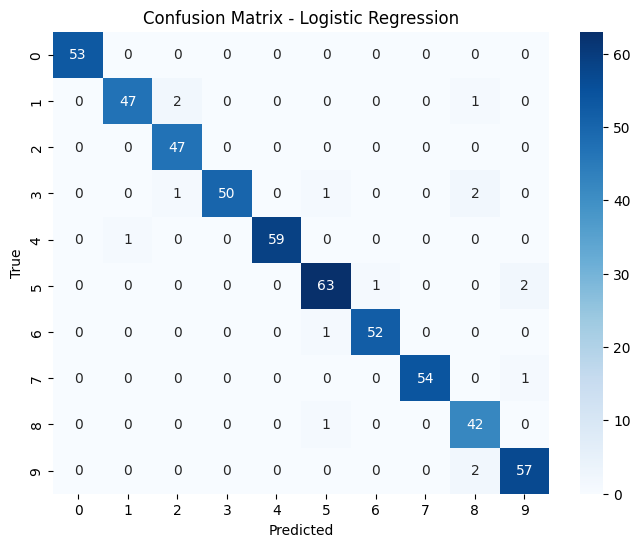

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = logreg.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()